In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [6]:
!unzip -q "human+activity+recognition+using+smartphones.zip" -d "/content/"


In [8]:
!ls "/content"


 human+activity+recognition+using+smartphones.zip  'UCI HAR Dataset.names'
 sample_data					   'UCI HAR Dataset.zip'


In [10]:
!unzip -q "/content/UCI HAR Dataset.zip" -d "/content/"


In [11]:
!ls "/content"


 human+activity+recognition+using+smartphones.zip  'UCI HAR Dataset'
 __MACOSX					   'UCI HAR Dataset.names'
 sample_data					   'UCI HAR Dataset.zip'


In [25]:
def load_signals(signal_prefixes, dataset_type="train", dataset_path="/content/UCI HAR Dataset/"):
    """
    Load Inertial Signals from UCI HAR Dataset
    """
    signals = []
    folder = f"{dataset_path}{dataset_type}/Inertial Signals/"
    for prefix in signal_prefixes:
        file_path = f"{folder}{prefix}{dataset_type}.txt"  # Add train/test suffix
        # Use raw string for regex to avoid SyntaxWarning
        df = pd.read_csv(file_path, sep=r"\s+", header=None)
        signals.append(df)
    return np.stack(signals, axis=2)

In [26]:
DATASET_PATH = "/content/UCI HAR Dataset/"

INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

In [28]:
X_train = load_signals(INPUT_SIGNAL_TYPES, dataset_type="train", dataset_path=DATASET_PATH)
X_test  = load_signals(INPUT_SIGNAL_TYPES, dataset_type="test", dataset_path=DATASET_PATH)

y_train = pd.read_csv(DATASET_PATH + "train/y_train.txt", header=None)[0]
y_test  = pd.read_csv(DATASET_PATH + "test/y_test.txt", header=None)[0]

In [29]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)
y_train = to_categorical(y_train - 1)
y_test  = to_categorical(y_test - 1)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7352, 128, 9)
X_test shape: (2947, 128, 9)
y_train shape: (7352, 6)
y_test shape: (2947, 6)


In [30]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, shuffle=True
)


In [31]:
model = Sequential()
model.add(LSTM(
    units=64,
    input_shape=(X_train.shape[1], X_train.shape[2]),
    return_sequences=False
))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,494 (91.77 KB)

 Trainable params: 23,494 (91.77 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=5,
    batch_size=64,
    verbose=1
)

Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.8962 - loss: 0.3307 - val_accuracy: 0.8382 - val_loss: 0.3753
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.8822 - loss: 0.3515 - val_accuracy: 0.9259 - val_loss: 0.1980
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9265 - loss: 0.2213 - val_accuracy: 0.9313 - val_loss: 0.2019
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.9317 - loss: 0.2086 - val_accuracy: 0.9395 - val_loss: 0.1671
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - accuracy: 0.9437 - loss: 0.1608 - val_accuracy: 0.9293 - val_loss: 0.1649


In [35]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)


Test Accuracy: 0.8941296339035034


In [36]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [37]:
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       496
           1       0.87      0.92      0.90       471
           2       0.94      0.97      0.95       420
           3       0.86      0.75      0.80       491
           4       0.79      0.86      0.82       532
           5       1.00      0.95      0.98       537

    accuracy                           0.89      2947
   macro avg       0.90      0.90      0.89      2947
weighted avg       0.90      0.89      0.89      2947



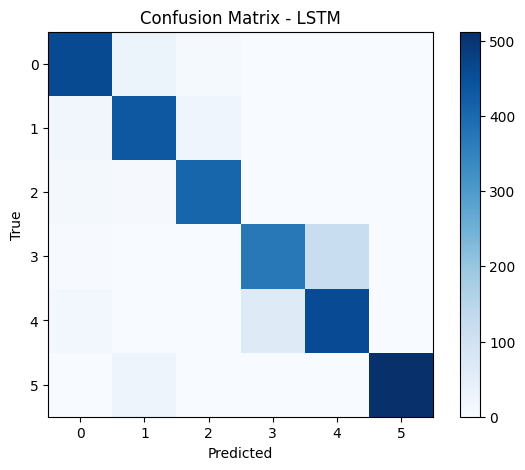

In [38]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(7,5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LSTM")
plt.show()


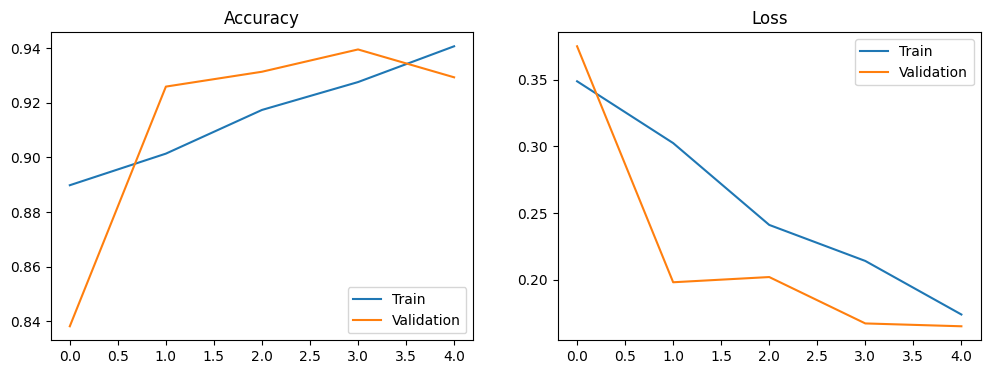

In [39]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [41]:
gru_model = Sequential()

gru_model.add(
    GRU(
        units=64,
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    )
)

gru_model.add(Dropout(0.5))

gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(6, activation='softmax'))

gru_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

gru_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,950 (74.02 KB)

 Trainable params: 18,950 (74.02 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 107ms/step - accuracy: 0.3811 - loss: 1.5604 - val_accuracy: 0.5384 - val_loss: 1.0601
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5183 - loss: 1.0798 - val_accuracy: 0.6336 - val_loss: 0.8716
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.6454 - loss: 0.8570 - val_accuracy: 0.7539 - val_loss: 0.5987
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.7388 - loss: 0.5950 - val_accuracy: 0.8491 - val_loss: 0.4127
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.8286 - loss: 0.4382 - val_accuracy: 0.8770 - val_loss: 0.3209
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.8794 - loss: 0.3365 - val_accuracy: 0.8919 - val_loss: 0.2687
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - accuracy: 0.8988 - loss: 0.2919 - val_accuracy: 0.9137 - val_loss: 0.2180
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.9160 - loss: 0.2312 - val_accuracy: 0.92

In [43]:
gru_loss, gru_acc = gru_model.evaluate(X_test, y_test, verbose=0)
print("GRU Test Accuracy:", gru_acc)


GRU Test Accuracy: 0.8778418898582458


In [44]:
y_pred_gru = gru_model.predict(X_test)
y_pred_classes_gru = np.argmax(y_pred_gru, axis=1)
y_true = np.argmax(y_test, axis=1)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


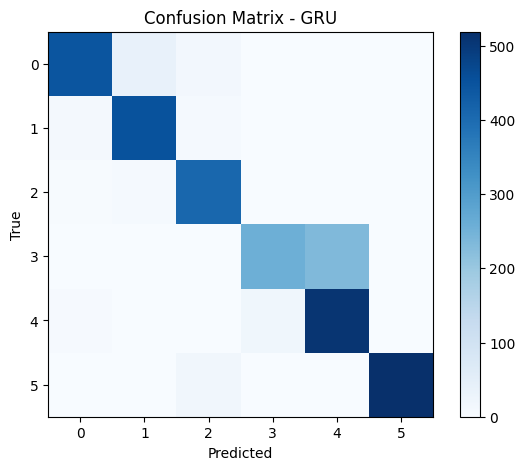

In [45]:
cm = confusion_matrix(y_true, y_pred_classes_gru)

plt.figure(figsize=(7,5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GRU")
plt.show()


In [46]:
print("LSTM Accuracy:", test_acc)
print("GRU Accuracy :", gru_acc)


LSTM Accuracy: 0.8941296339035034
GRU Accuracy : 0.8778418898582458


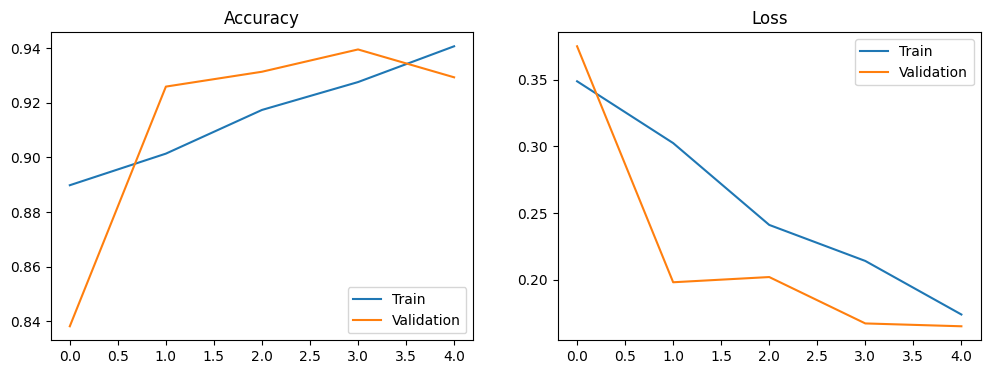

In [49]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


In [47]:
deep_gru = Sequential()

deep_gru.add(GRU(64, return_sequences=True,
                 input_shape=(X_train.shape[1], X_train.shape[2])))

deep_gru.add(GRU(64))
deep_gru.add(Dropout(0.5))

deep_gru.add(Dense(6, activation='softmax'))

deep_gru.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

deep_gru.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 128, 64)        │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,750 (155.27 KB)

 Trainable params: 39,750 (155.27 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
gru_history = deep_gru.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 215ms/step - accuracy: 0.3917 - loss: 1.4828 - val_accuracy: 0.5500 - val_loss: 1.0331
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.5428 - loss: 1.0390 - val_accuracy: 0.6723 - val_loss: 0.7521
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 267ms/step - accuracy: 0.7099 - loss: 0.6792 - val_accuracy: 0.8498 - val_loss: 0.4016
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 47s 326ms/step - accuracy: 0.8723 - loss: 0.3591 - val_accuracy: 0.9429 - val_loss: 0.1796
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 38s 298ms/step - accuracy: 0.9325 - loss: 0.1949 - val_accuracy: 0.9395 - val_loss: 0.1502


In [52]:
gru_loss, deep_gru_acc = deep_gru.evaluate(X_test, y_test, verbose=0)
print("GRU Test Accuracy:", deep_gru_acc)


GRU Test Accuracy: 0.8985409140586853


In [53]:
print("LSTM Accuracy:", test_acc)
print("GRU Accuracy :", gru_acc)
print("Deep GRU Accuracy :", deep_gru_acc)

LSTM Accuracy: 0.8941296339035034
GRU Accuracy : 0.8778418898582458
Deep GRU Accuracy : 0.8985409140586853


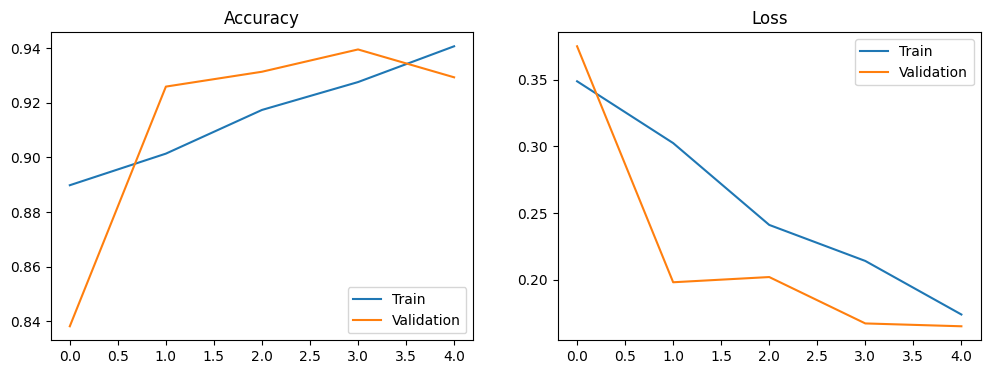

In [54]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.legend()

plt.show()


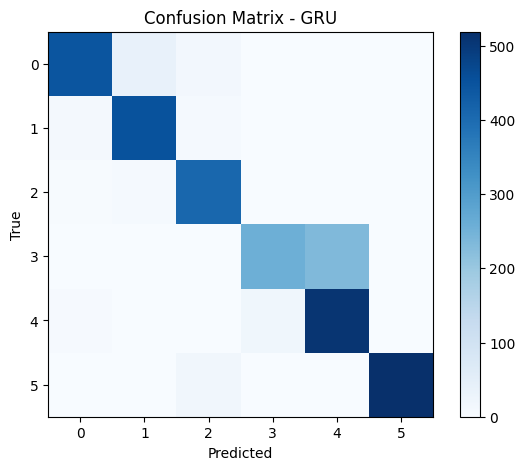

In [55]:
cm = confusion_matrix(y_true, y_pred_classes_gru)

plt.figure(figsize=(7,5))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - GRU")
plt.show()
